## Mini Project - European Soccer Dataset

Veri setini Kaggle üzerinden indirebilirsiniz:
https://www.kaggle.com/hugomathien/soccer

In [317]:
#Paketler
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Veri Okuma ve İlk Bakış

In [451]:
#Sqlite uzantılı veri tabanı dosyasını python ile okumak:
cnx = sqlite3.connect('database.sqlite')
Player_Data = pd.read_sql_query("SELECT * FROM Player", cnx)
Player_Attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

#bu kısma dokunmayın.

1. Player_Data'nın ve Player_Attributes'un ilk 5 satırını gösterin.

In [452]:
Yedek_Attributes=Player_Attributes

In [453]:
Player_Data.head()


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [454]:
Player_Attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


2. Player_Data'nın ve Player_Attributes'un her kolonunun veri tipini (Dtype) ve her kolondaki eksik eleman sayısını (null-count) birer tablo içerisinde gösterin. 

In [455]:
Player_Data.dtypes

id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object

In [456]:
Player_Attributes.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [457]:
Player_Data.isnull().any()
#bu datada null bulunmuyor.

id                    False
player_api_id         False
player_name           False
player_fifa_api_id    False
birthday              False
height                False
weight                False
dtype: bool

In [458]:
Player_Attributes.isnull().any()
# karşılığı true olan columnlarda null değeri var.

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking       

In [459]:
Player_Attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

3. Player_Data'nın ve Player_Attributes'un her kolonunun satır sayısı (count), kolon ortalaması (mean), standart sapma (std), min, max ve percentile (.25, .5, .75) değerlerini bir tablo içerisinde gösterin.

In [460]:
Player_Data.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


In [461]:
Player_Attributes.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


#### Veri Düzenleme & Temizleme

4. Player_Data'daki "birthday" kolonunu Pandas'ın datetime biçimine çevirin ve yeni bir kolon olarak bu tabloya ekleyin. Tablonun son halinin ilk 5 satırını gösterin.

In [462]:
Player_Data['Pandas Birthday'] = pd.to_datetime(Player_Data['birthday'])
Player_Data.head()
#player_datadaki birthdayleri pandas stiline çevirdim

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,Pandas Birthday
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,1989-12-15
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,1991-05-13
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,1982-05-08
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,1979-11-08


5.  Player_Attributes tablosundaki date (pandas datetime tipindeki) ve Player_Data tablosundaki birthday kolonlarını kullanarak Player_Attributes tablosuna "age" kolonu ekleyin.

In [463]:
Player_Attributes = Player_Attributes.merge(Player_Data, on='player_api_id', how='inner')
#oyuncuya karşılık gelen birthdayi yanına koymak için mergeledim.




In [464]:
Player_Attributes['Pandas New Date'] = pd.to_datetime(Player_Attributes['date'])
#player_attributestaki dateleri pandas stiline çevirdim



In [465]:
Player_Attributes["AGE"]= Player_Attributes["Pandas New Date"].dt.year- Player_Attributes["Pandas Birthday"].dt.year
Player_Attributes


,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight,Pandas Birthday,Pandas New Date,AGE
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,2016-02-18,24
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,2015-11-19,23
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,2015-09-21,23
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,2015-03-20,23
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,2007-02-22,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,1982-06-05,2009-08-30,27
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,1982-06-05,2009-02-22,27
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,1982-06-05,2008-08-30,26
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,1982-06-05,2007-08-30,25


6. Player_Data'daki Ağırlık ve Boy kolonlarını kullanarak vücut kitle endeksini (BMI) hesaplayın ve yeni bir kolon olarak ekleyin. Verinin son halinin ilk 5 satırını gösterin.

In [492]:
Player_Data["BMI"]= Player_Data["weight"]/((Player_Data["height"]/100)**2)
Player_Data.head()
#ölçüler metric sisteme göre değil sanırım, weightler çok büyük o yüzden BMI değerleri büyük çıktı.
#weightler pound olarak, heightler cm olarak verilmiş gibi duruyor ama emin olamadım.

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,Pandas Birthday,BMI
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,55.912535
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,1989-12-15,50.412219
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,1991-05-13,56.282135
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,1982-05-08,59.201507
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,1979-11-08,46.045617


7. Kolonlardaki eksik eleman sayılarını kontrol edip eksik hücreleri ilgili kolonun ortalaması ile dolduran veya çok fazla eksik hücre içeren kolonları silen bir fonksiyon yazın. Bu fonksiyon, eğer kolondaki eksik hücre sayısı toplam kolon uzunluğunun %10'undan AZ ise, eksik elemanları kolonun ortalaması ile doldurur; fazla ise ilgili kolonu siler. Sonuç olarak da kaç kolonu sildiğini veya kaç hücreyi ortalama ile doldurduğunu print eder. Fonksiyon içerisinde gerekli kontroller yapılmalı ve conditionlara bağlı olarak gereken aksiyonlar gerçekleştirilmelidir. Fonksiyonun çalışmasından sonra elde edilen yeni veri setinin uzunluğu orijinal veri setinin yüzde kaçına denk geliyor, print edin. Kategorik değişkene sahip (string) kolonlar için kolon ortalaması = 'kolondaki en çok tekrar eden değer' olarak düşünebilirsiniz.

In [548]:
#sorunun tamamını anlamadım ama %10 undan az ise bunu yapmalıyız sanırım
#Player_Attributes= Player_Attributes.fillna(Player_Attributes.mean())

8. Player_Data ve Player_Attributes tablolarında ortak olarak bulunan player_api_id kolonundaki değerleri kullanarak Player_Data tablosundaki player_name, birthday, age, height ve BMI kolonlarını Player_Attributes tablosuna ilave edin (mapping). 
Tablonun son halinin ilk 5 satırını print edin. 

In [469]:
#soru 5te yukarda yapmıştım zaten BMI için tekrar mergeledim, ekstra aynı olan sütunları sildim fazlalık yapmasın diye.
BMI_Test= Player_Attributes.merge(Player_Data, on="player_api_id", how="inner")
del BMI_Test["id"]
del BMI_Test["player_name_y"]
del BMI_Test["player_fifa_api_id"]
del BMI_Test["birthday_y"]
del BMI_Test["height_y"]
del BMI_Test["weight_y"]

Player_Attributes=BMI_Test
Player_Attributes


,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,player_name_x,player_fifa_api_id_y,birthday_x,height_x,weight_x,Pandas Birthday_x,Pandas New Date,AGE,Pandas Birthday_y,BMI
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,2016-02-18,24,1992-02-29,55.912535
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,2015-11-19,23,1992-02-29,55.912535
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,2015-09-21,23,1992-02-29,55.912535
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,2015-03-20,23,1992-02-29,55.912535
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992-02-29,2007-02-22,15,1992-02-29,55.912535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,1982-06-05,2009-08-30,27,1982-06-05,54.116355
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,1982-06-05,2009-02-22,27,1982-06-05,54.116355
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,1982-06-05,2008-08-30,26,1982-06-05,54.116355
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,1982-06-05,2007-08-30,25,1982-06-05,54.116355


#### Sorular

9. Player_Attributes tablosundaki player_api_id kolonunu kullanarak tabloda kaç tekil (unique) oyuncunun bulunduğunu print edin. Buna göre her oyuncu tabloda ortalama kaç kez yer alıyor?

In [470]:
len(Player_Attributes["player_api_id"].unique())
#unique oyuncu sayısı 11,060

11060

In [471]:
Player_Attributes.shape
#tablodaki total row sayısı 183,978

(183978, 53)

In [472]:
183978/11060 
#her oyuncu ortalama 16.6 kere yer alıyor

16.634538878842676

10. Player_Attributes tablosundaki ortalama ratingi en yüksek oyuncu kimdir ve id'si nedir? Bu oyuncuya ait verileri Player_Sample isimli ayrı bir tabloya kopyalayın ve bu tabloyu date kolonuna göre yeniden eskiye doğru sıralayarak print edin.

In [478]:
Player_Attributes.sort_values(by='overall_rating', ascending=False)[:1]
# en yüksek ratingli oyuncunun messi olduğunu bulduk
# player_api_id = 30981

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,player_name_x,player_fifa_api_id_y,birthday_x,height_x,weight_x,Pandas Birthday_x,Pandas New Date,AGE,Pandas Birthday_y,BMI
102483,102484,158023,30981,2015-10-16 00:00:00,94.0,94.0,left,medium,low,80.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2015-10-16,28,1987-06-24,54.900979


In [479]:
is_messi = Player_Attributes['player_name_x'].str.contains('Lionel Messi')
data_messi=Player_Attributes[is_messi]
data_messi
#datadaki bütün messileri bulduk

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,player_name_x,player_fifa_api_id_y,birthday_x,height_x,weight_x,Pandas Birthday_x,Pandas New Date,AGE,Pandas Birthday_y,BMI
102482,102483,158023,30981,2015-12-17 00:00:00,94.0,94.0,left,medium,low,80.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2015-12-17,28,1987-06-24,54.900979
102483,102484,158023,30981,2015-10-16 00:00:00,94.0,94.0,left,medium,low,80.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2015-10-16,28,1987-06-24,54.900979
102484,102485,158023,30981,2015-09-21 00:00:00,94.0,95.0,left,medium,low,80.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2015-09-21,28,1987-06-24,54.900979
102485,102486,158023,30981,2015-06-26 00:00:00,93.0,93.0,left,medium,low,84.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2015-06-26,28,1987-06-24,54.900979
102486,102487,158023,30981,2015-03-13 00:00:00,93.0,95.0,left,medium,low,84.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2015-03-13,28,1987-06-24,54.900979
102487,102488,158023,30981,2015-02-20 00:00:00,93.0,95.0,left,medium,low,84.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2015-02-20,28,1987-06-24,54.900979
102488,102489,158023,30981,2015-01-23 00:00:00,93.0,95.0,left,medium,low,84.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2015-01-23,28,1987-06-24,54.900979
102489,102490,158023,30981,2014-10-17 00:00:00,93.0,95.0,left,medium,low,84.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2014-10-17,27,1987-06-24,54.900979
102490,102491,158023,30981,2014-09-18 00:00:00,93.0,95.0,left,medium,low,84.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2014-09-18,27,1987-06-24,54.900979
102491,102492,158023,30981,2014-04-25 00:00:00,94.0,97.0,left,medium,low,84.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2014-04-25,27,1987-06-24,54.900979


In [477]:
Player_Sample= data_messi.copy() # bulduğumuz messi datalarını kopyaladık
Player_Sample.sort_values(by='Pandas New Date', ascending=False) #false= azalan
#date'e göre sortladık



,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,player_name_x,player_fifa_api_id_y,birthday_x,height_x,weight_x,Pandas Birthday_x,Pandas New Date,AGE,Pandas Birthday_y,BMI
102482,102483,158023,30981,2015-12-17 00:00:00,94.0,94.0,left,medium,low,80.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2015-12-17,28,1987-06-24,54.900979
102483,102484,158023,30981,2015-10-16 00:00:00,94.0,94.0,left,medium,low,80.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2015-10-16,28,1987-06-24,54.900979
102484,102485,158023,30981,2015-09-21 00:00:00,94.0,95.0,left,medium,low,80.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2015-09-21,28,1987-06-24,54.900979
102485,102486,158023,30981,2015-06-26 00:00:00,93.0,93.0,left,medium,low,84.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2015-06-26,28,1987-06-24,54.900979
102486,102487,158023,30981,2015-03-13 00:00:00,93.0,95.0,left,medium,low,84.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2015-03-13,28,1987-06-24,54.900979
102487,102488,158023,30981,2015-02-20 00:00:00,93.0,95.0,left,medium,low,84.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2015-02-20,28,1987-06-24,54.900979
102488,102489,158023,30981,2015-01-23 00:00:00,93.0,95.0,left,medium,low,84.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2015-01-23,28,1987-06-24,54.900979
102489,102490,158023,30981,2014-10-17 00:00:00,93.0,95.0,left,medium,low,84.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2014-10-17,27,1987-06-24,54.900979
102490,102491,158023,30981,2014-09-18 00:00:00,93.0,95.0,left,medium,low,84.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2014-09-18,27,1987-06-24,54.900979
102491,102492,158023,30981,2014-04-25 00:00:00,94.0,97.0,left,medium,low,84.0,...,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,1987-06-24,2014-04-25,27,1987-06-24,54.900979


11. Sağ ayaklı oyuncuların sol ayaklı oyunculara göre ratinglerinde kayda değer bir fark var mı? Ortalamaları üzerinden kıyaslayın.

In [480]:
test=Player_Attributes.dropna(subset=["preferred_foot"]) #preffered_foot için missing valueları çıkardık
is_left = test['preferred_foot'].str.contains('left') #sol ayaklıları filtreledik
test[is_left]["overall_rating"].mean() #sol ayaklıların rating ortalamasını aldık



68.6261820132788

In [481]:
is_right = test['preferred_foot'].str.contains('right') #sağ ayaklıları filtreledik
test[is_right]["overall_rating"].mean() #sağ ayaklıların rating ortalamasını aldık

68.59155835241928

#### Veri Görselleştirme

12. Player_Sample tablosunu kullanarak bu oyuncunun overall rating'inin yaşına göre değişimini plot edin (line plot). Grafikteki eksen etiketlerinin ve başlığın doğru şekilde göründüğünden emin olun.

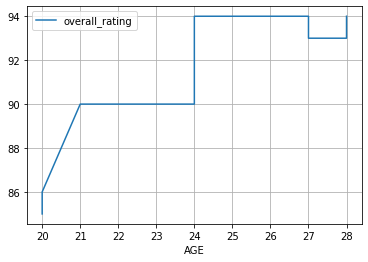

In [482]:
Player_Sample.plot(x="AGE", y= "overall_rating",grid=True)

13. Player_Attributes tablosundaki overall_rating kolonunu (10,5) boyutunda bir histogram olarak plot edin. Histogramın bin sayısını 30, rengini mavi olarak ayarlayın. Grafikteki etiketlerin ve başlığın doğru şekilde göründüğünden emin olun. Grafiği sayısal olarak da anlayabilmek adına grafiğin altına overall_rating kolonunun descriptive istatistiklerini print edin (.describe()). 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9420fab880>]],
      dtype=object)

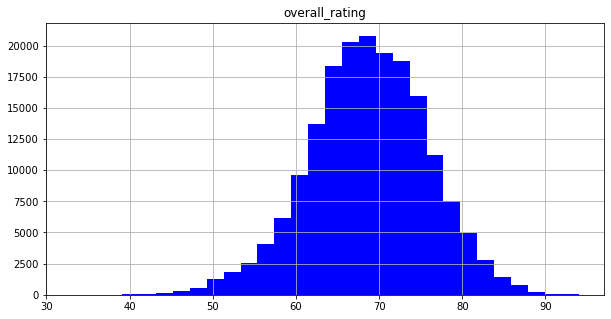

In [483]:
Player_Attributes.hist(column="overall_rating",bins=30, color="blue", figsize=(10,5))

In [484]:
Player_Attributes["overall_rating"].describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

14. Benzer şekilde age kolonunu plot edin (histogram).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94e4559eb0>]],
      dtype=object)

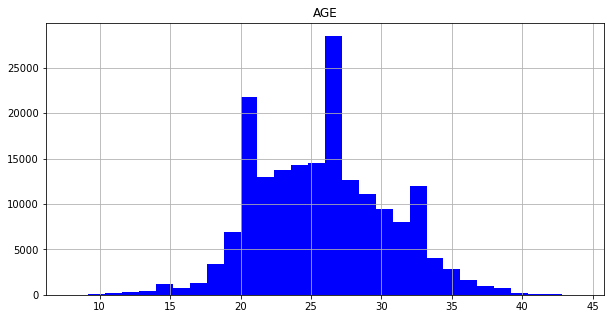

In [485]:
Player_Attributes.hist(column="AGE",bins=30, color="blue", figsize=(10,5))

15. Overall_rating'in age'e göre dağılımını plot edin (scatter plot).

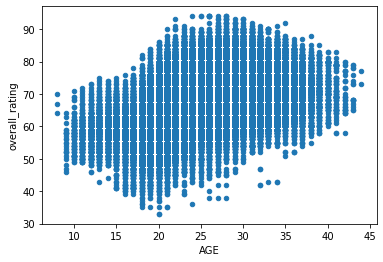

In [486]:
Player_Attributes.plot.scatter("AGE", "overall_rating")

16. Dağılım grafiğini daha anlaşılır kılabilmek için age kolonunu bin'lere bölüp boxplot olarak çizin ve overall_rating'e göre değişimlerini gözlemleyin. Bin'lere bölme ve plotting işlemini yapmak için aşağıda yarım olarak verilmiş kod bloğunu kullanabilirsiniz.

In [ ]:
age_bins = [0, 20, 22, 24, 26, 28, 30, 32, np.inf]
age_bin_names = ['<20', '20-22', '22-24', '24-26', '26-28', '28-30', '30-32', '>32']

Player_Attributes['age_bin'] = #bu kısmı doldurun

age1 = #bu kısmı doldurun
age2 = #bu kısmı doldurun
age3 = #bu kısmı doldurun
age4 = #bu kısmı doldurun
age5 = #bu kısmı doldurun
age6 = #bu kısmı doldurun
age7 = #bu kısmı doldurun
age8 = #bu kısmı doldurun

age_bin_data = [ age1, age2, age3, age4, age5, age6, age7, age8 ]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
plt.boxplot(age_bin_data, patch_artist=True)
axes.set(#bu kısmı doldurun)
axes.yaxis.grid(True)
axes.set_xticklabels(age_bin_names, ha='center')
plt.show()

17. height vs overall_rating scatter plotunu çizin.

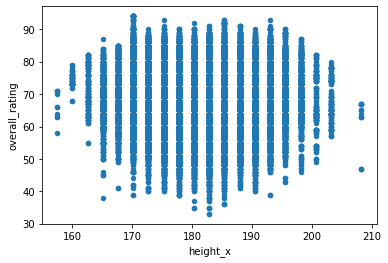

In [490]:
Player_Attributes.plot.scatter("height_x","overall_rating")

18. BMI histogramını çizin.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9445687e80>]],
      dtype=object)

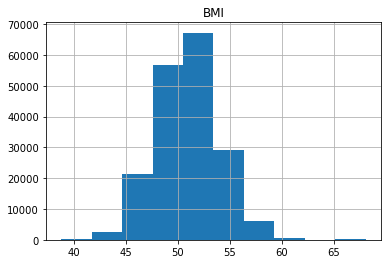

In [491]:
Player_Attributes.hist(column="BMI")
#BMI uniti doğru olmadığı için görsel olarak farklılık olabilir doğru cevapla.
#weightler kg olarak verilmemiş gibi duruyor.

19. BMI vs overall_rating histogramını çizin.

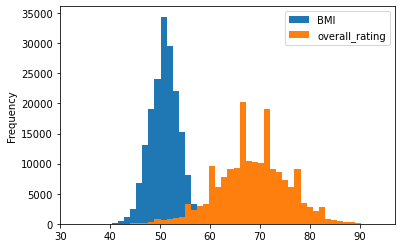

In [516]:
Player_Attributes[["BMI","overall_rating"]].plot.hist(bins=50)

20. Aşağıda verilen attribute'ların overall_rating ile olan korelasyonunu inceleyin ve korelasyon değerlerini barchart olarak çizin.

In [536]:
Numerical_Attributes = ["overall_rating",'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle']

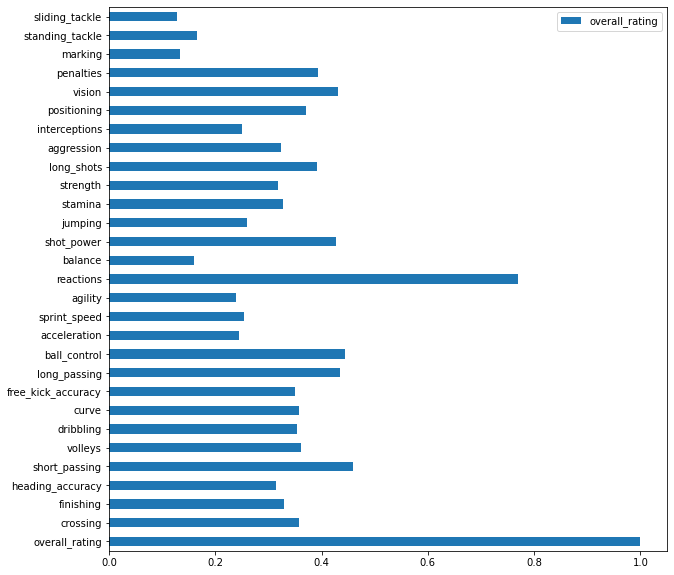

In [547]:
correl=Player_Attributes[Numerical_Attributes].corr()
correl[["overall_rating"]].plot.barh(figsize=(10,10))
